## Importing libraries 

In [1]:
import keras
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Applications/anaconda3/envs/Ml_course/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/envs/Ml_course/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/envs/Ml_course/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applica

# Transforming the photos 

In [2]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.0,
    height_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None
)


## creating data for face detection 

In [3]:
def mark_images(f):
    ex = -1
    img = cv2.resize(cv2.imread(f), (640, 480))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        plt.imshow(gray[y:y+h,x:x+w])
        plt.show()
        face_id = input('\n Assign an ID number and press enter ')
        im = np.expand_dims(np.expand_dims(gray[y:y+h,x:x+w], 0), 3)
        datagen.fit(im)
        for x, val in zip(datagen.flow(im, save_to_dir='project/dataset/', save_prefix="User_" + str(face_id), save_format='jpg'),range(100)):
            ex = 1

## capturing face data 

In [5]:
cam = cv2.VideoCapture(0)
cam.set(3, 640)
cam.set(4, 480)
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

face_id = input('\n Assign an ID number and press enter ')
print("\n  Look the camera and wait ...")

ex = -1
while(True):
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        cv2.imshow('image', img)
        im = np.expand_dims(np.expand_dims(gray[y:y+h,x:x+w], 0), 3)
        datagen.fit(im)
        

        for x, val in zip(datagen.flow(im, save_to_dir='project/dataset/', save_prefix="User_" + str(face_id), save_format='jpg'),range(100)):
                ex = 1

    k = cv2.waitKey(100) & 0xff
    if k == 27:
        break 
    if ex == 1:
        break
print("\n Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 Assign an ID number and press enter 1

  Look the camera and wait ...

 Exiting Program and cleanup stuff


## If want to add any other image from the folder

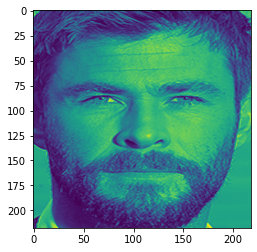


 Assign an ID number and press enter 2


In [6]:
mark_images('chris.jpeg')

## Training the model

if there is an error for the .DS_STORE use -->" find . -name ".DS_Store" -delete " for the folder 

In [7]:
path = 'project/dataset'
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L')
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split("_")[1])
        faces = detector.detectMultiScale(img_numpy)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    
    return faceSamples,ids
print ("\n Training faces. It will take a few seconds. please Wait ...")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))
recognizer.write('project/trainer/trainer.yml') 
print("\n  {0} faces trained. Exiting Program".format(len(np.unique(ids))))


 Training faces. It will take a few seconds. please Wait ...

  2 faces trained. Exiting Program


## Face detection

In [8]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('project/trainer/trainer.yml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
id = 0
names = ['none','Uday','Chris'] 



In [9]:
cam = cv2.VideoCapture(0)
cam.set(3, 640) 
cam.set(4, 480) 

minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)




In [11]:
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH)),
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
         
        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(confidence))
        else:
            id = "unknown"
            confidence = "  {0}%".format(round(confidence))
        
        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
    
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
cam.release()
cv2.destroyAllWindows()